## Setup

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Constants

In [6]:
g = 1.25
k = 3

Helper functions

In [7]:
wM = lambda M: np.degrees(k*np.arctan(np.sqrt(M**2-1)/k)-np.arctan(np.sqrt(M**2-1)))

In [8]:
Mw = lambda win: fsolve(lambda M: wM(M)-win, 2)[0]

In [9]:
thw = lambda Ip, Im: (0.5*(Ip+Im), 0.5*(Ip-Im))

In [10]:
Iminus_center = lambda incoming_Ip: -incoming_Ip
thw_center = lambda incoming_Ip: (0, incoming_Ip)

Initial conditions

In [11]:
M0 = 1.1
Me_pset = 4
w_0, w_e = wM(M0), wM(Me_pset)
th_0, th_e = 0,0

## Part (a)

In [12]:
line_number = 6
discretization = line_number*(line_number+1)/2+1
th, w = np.empty((2,discretization))*np.nan
th[0] = th[1] = th_0
w[0] = w[1] = w_0
Im_1 = th_0-w_0
Ip_1, Ip_e = th_0+w_0, th_e+w_e
Ips = np.linspace(Ip_1, Ip_e, line_number)

In [13]:
Im = Im_1
idx = 1
for Im_counter in range(line_number-1):
    idx +=1
    for counter, Ip_i in enumerate(Ips[Im_counter+1:]):
        th[idx], w[idx] = thw(Ip_i, Im)
        idx +=1
    th[idx], w[idx] = thw_center(Ips[Im_counter+1])
    Im = Iminus_center(Ips[Im_counter+1])

In [14]:
table = pd.DataFrame()
table["omegas"], table["thetas"] = w, th

In [15]:
table["M"] = table["omegas"].apply(Mw)
table["mu"] = table["M"].apply(lambda M: np.degrees(np.arctan(1/np.sqrt(M**2-1))))
table["th+mu"] = table["thetas"]+table["mu"]
table["th-mu"] = table["thetas"]-table["mu"]
table["I+"] = table["thetas"]+table["omegas"]
table["I-"] = table["thetas"]-table["omegas"]
table["P/Pc"] = table["M"].apply(lambda M: (1+(g-1)/2*M**2)**(-g/(g-1)))
table["alphas"] = -np.radians(table["th-mu"])
table["betas"] = np.radians(table["th+mu"])

In [16]:
table[["M", "I+", "I-", "omegas", "thetas", "mu", "th+mu", "th-mu", "P/Pc", "alphas", "betas"]]

,M,I+,I-,omegas,thetas,mu,th+mu,th-mu,P/Pc,alphas,betas
0,1.100000,1.434844,-1.434844,1.434844,0.000000,65.380023,65.380023,-65.380023,0.494483,1.141097,1.141097
1,1.100000,1.434844,-1.434844,1.434844,0.000000,65.380023,65.380023,-65.380023,0.494483,1.141097,1.141097
2,1.386455,17.386632,-1.434844,9.410738,7.975894,46.158937,54.134831,-38.183043,0.340720,0.666420,0.944831
3,1.626345,33.338419,-1.434844,17.386632,15.951787,37.942890,53.894677,-21.991103,0.239730,0.383817,0.940640
4,1.861247,49.290206,-1.434844,25.362525,23.927681,32.498265,56.425946,-8.570585,0.165471,0.149585,0.984819
5,2.101839,65.241993,-1.434844,33.338419,31.903574,28.409749,60.313323,3.493826,0.110979,-0.060979,1.052666
6,2.354392,81.193780,-1.434844,41.314312,39.879468,25.134084,65.013552,14.745384,0.071920,-0.257355,1.134701
7,1.626345,17.386632,-17.386632,17.386632,0.000000,37.942890,37.942890,-37.942890,0.239730,0.662228,0.662228
8,1.861247,33.338419,-17.386632,25.362525,7.975894,32.498265,40.474159,-24.522372,0.165471,0.427996,0.706407
9,2.101839,49.290206,-17.386632,33.338419,15.951787,28.409749,44.361536,-12.457962,0.110979,0.217432,0.774255


## Part (b)

In [17]:
upstreams = {
    1: [0, 22],
    2: [0, 1],
    3: [0, 2],
    4: [0, 3],
    5: [0, 4],
    6: [0, 5],
    7: [2, 1],
    8: [3, 7],
    9: [4, 8],
    10: [5, 9],
    11: [6, 10],
    12: [8, 7],
    13: [9, 12],
    14: [10, 13],
    15: [11, 14],
    16: [13, 12],
    17: [14, 16],
    18: [15, 17],
    19: [17, 16],
    20: [18, 19],
    21: [20, 19],
    23: [0,6],
    24: [23, 11],
    25: [24, 15],
    26: [25, 18],
    27: [26, 20],
    28: [27, 21]
}
onthewall = [1, 7, 12, 16, 19, 21]

In [18]:
x = np.empty(29)*np.nan
y = np.empty(29)*np.nan
x[0] = 0
y[0] = 1
x[22] = 0
y[22] = 0

In [19]:
def position(xa, ya, alpha, xb, yb, beta):
    xc = (ya-yb+xa*np.tan(alpha)+xb*np.tan(beta))/(np.tan(alpha)+np.tan(beta))
    yc = (yb*np.tan(alpha)+ya*np.tan(beta)+(xa-xb)*np.tan(alpha)*np.tan(beta))/(np.tan(alpha)+np.tan(beta))
    return xc, yc

In [20]:
def positionofidx(idx):
    upstream_plus_idx, upstream_minus_idx = upstreams[idx]
    if upstream_plus_idx == 0:
        upstream_theta_idx = idx
    else:
        upstream_theta_idx = upstream_plus_idx 
        
    #print(upstream_plus_idx, upstream_minus_idx)
    xa, ya = x[upstream_plus_idx], y[upstream_plus_idx]
    xb, yb = x[upstream_minus_idx], y[upstream_minus_idx]
     
    alpha_upstream = table["alphas"].iloc[upstream_theta_idx]
    alpha_idx = table["alphas"].iloc[idx]
    alpha = np.average([alpha_upstream, alpha_idx])

    isonwall = idx in onthewall
    if isonwall:
        xc,yc = position(xa, ya, alpha, xb, yb, 0)
    else:
        beta_upstream =  table["betas"].iloc[upstream_minus_idx]
        beta_idx = table["betas"].iloc[idx]
        beta = np.average([beta_upstream, beta_idx])
        #print(xa,ya,xb,yb, np.degrees(alpha), np.degrees(beta))
        xc,yc = position(xa, ya, alpha, xb, yb, beta)
        
    return xc, yc
    

In [21]:
for idx in range(1,22):
    x[idx], y[idx] = positionofidx(idx)

In [22]:
np.array((x,y)).transpose()

array([[  0.        ,   1.        ],
       [  0.45825757,   0.        ],
       [  0.71392807,   0.43853605],
       [  0.86729773,   0.64974563],
       [  1.00560167,   0.84844509],
       [  1.14189109,   1.06971754],
       [  1.28000324,   1.33688646],
       [  1.27395893,   0.        ],
       [  1.65527968,   0.3110921 ],
       [  2.0344094 ,   0.65750174],
       [  2.44725183,   1.09577799],
       [  2.91542652,   1.68822157],
       [  2.28016059,   0.        ],
       [  2.96952862,   0.41029157],
       [  3.7968916 ,   1.00548878],
       [  4.83527003,   1.91341189],
       [  4.11046292,   0.        ],
       [  5.61593172,   0.70885533],
       [  7.69845909,   1.95937077],
       [  8.25548589,   0.        ],
       [ 12.28164861,   1.55000402],
       [ 20.02163784,   0.        ],
       [  0.        ,   0.        ],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
 

In [23]:
wall_thetas = {0:0}

In [27]:
def wallpositions(idx):
    upstream_plus_idx, upstream_minus_idx = upstreams[idx]
    xa, ya = x[upstream_plus_idx], y[upstream_plus_idx]
    xb, yb = x[upstream_minus_idx], y[upstream_minus_idx]
    theta_upstream = np.radians(table["thetas"].iloc[upstream_minus_idx])
    theta_previous = wall_thetas[upstream_plus_idx]
    theta_current = np.average([theta_upstream, theta_previous])
    wall_thetas[idx] = theta_upstream
    beta_upstream = table["betas"].iloc[upstream_minus_idx]
    xc, yc = position(xa, ya, -theta_current, xb, yb, beta_upstream)
    return xc, yc

In [28]:
wallidxs = range(23,29)

In [29]:
for idx in wallidxs:
    x[idx], y[idx] = wallpositions(idx)

In [30]:
allwallidxs = [0] + wallidxs

In [32]:
nozzle_height = y[-1]

In [33]:
"nozzle height is %f"%nozzle_height

'nozzle height is 18.150323'

In [40]:
xy = np.array([x,y])

In [42]:
%matplotlib notebook

<IPython.core.display.Javascript object>


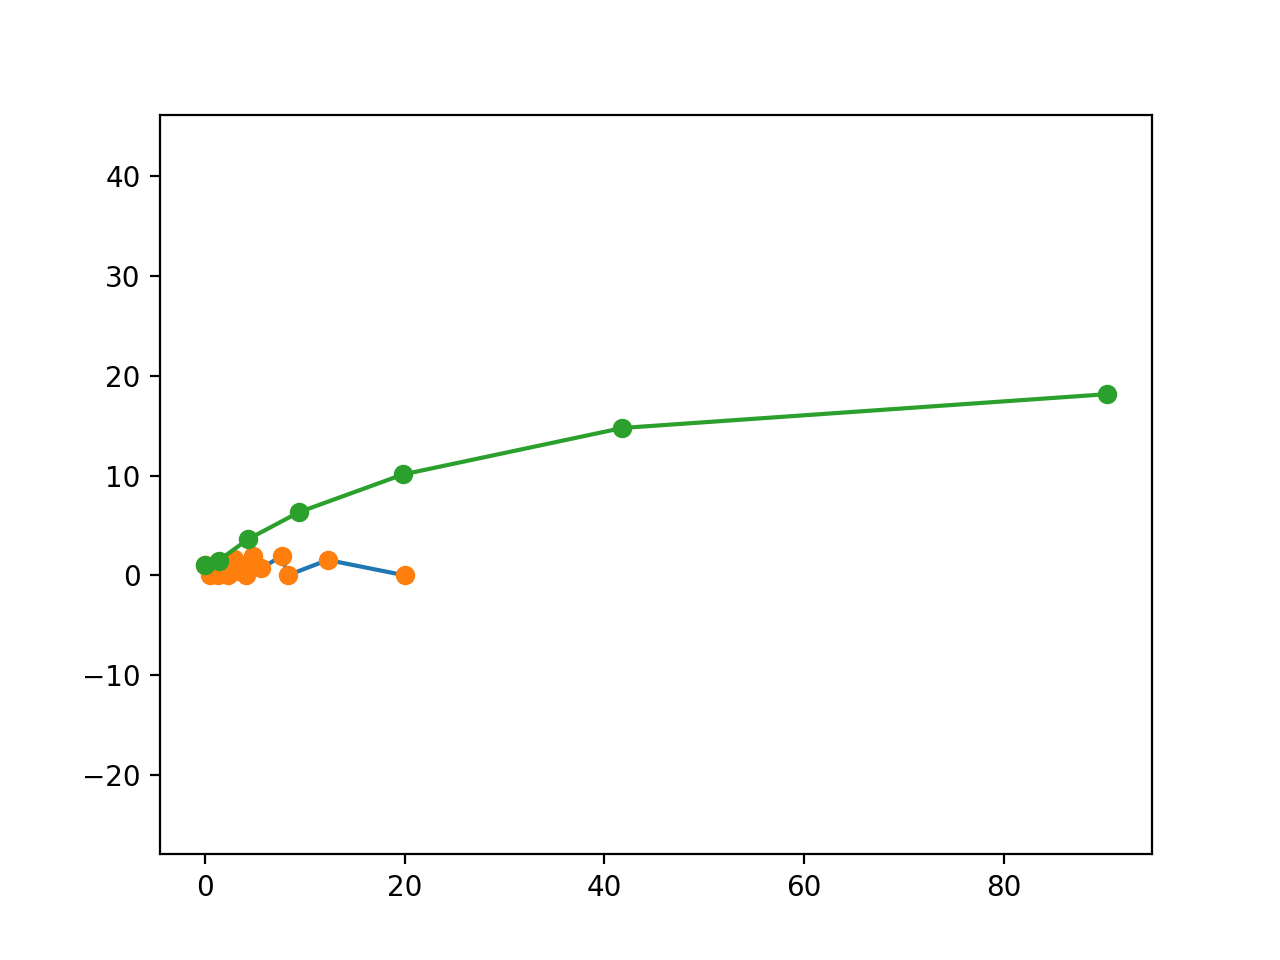

(-4.5158768684213717,
 94.833414236848796,
 -0.90751616057925766,
 19.057839372164409)

In [44]:
plt.plot(x[:22],y[:22])
plt.plot(x[:22],y[:22],'o')
plt.plot(x[[0]+wallidxs],y[[0]+wallidxs], 'o-')
plt.axis('equal')

### Part (c)

In [ ]:
isenT = lambda M: 1/(1+(g-1)/2*M**2)
isend = lambda M: isenT(M)**(1/(g-1))
Mratio = M0/Me_pset
Tratio = isenT(M0)/isenT(Me_pset)
uratio = Mratio*np.sqrt(Tratio)
dratio = isend(M0)/isend(Me_pset)
hanlyt = uratio*dratio

In [ ]:
hanlyt

In [ ]:
(M0/Me_pset)*((1+(g-1)/2*Me_pset**2)/(1+(g-1)/2*M0**2))**((g+1)/(2*(g-1)))

### Pressure

In [57]:
dh = np.diff(y[allwallidxs])

In [58]:
def moving_average(a, n=2) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [62]:
prewallidx = [0, 6, 11, 15, 18, 20, 21]

In [87]:
wall_pressures = table["P/Pc"].iloc[prewallidx].values
wall_pressures_segment = moving_average(wall_pressures) - wall_pressures[-1]

In [88]:
thrust_coeff = np.sum(wall_pressures_segment *dh)
thrust_coeff

0.44435779038862849

In [89]:
truncated_thrust_coeff = np.sum(wall_pressures_segment[:-1] *dh[:-1])
loss_in_thrust = (1-truncated_thrust_coeff/thrust_coeff)*100

In [90]:
"Loss in thrust = %f %%" % loss_in_thrust

'Loss in thrust = 1.538807 %'